In [17]:
#Importing libraries
import numpy
from binance.client import Client
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Insert apiKey and secretKay here
api_key = "gcJLtOs6tZYTOBEyIYY0JZBDagmFMkc5SY5T8R792cCUgBn7YCLfG7pOJZG3J36x"
api_secret = "EYyaqoqRyPxozdDQQmlL7xQiHaqDIxgGAav68UoYAznTAOI6darEG132kavhI3Vh" 


#if you wish to use  test net of binance exchange, assign True to "testnet" argument
client = Client(api_key, api_secret, testnet=False)


#Rate limit: 
#1200 requests per minute
#10 orders per second
#100,000 orders per 24hrs


In [24]:
#Define necessary variables
#Also note that binance gets timestamp in milliseconds
time_start = round( datetime.timestamp(datetime.now())*1000 ) 
time_end   = round( datetime.timestamp(datetime.strptime("25 October 2021, 10:12:01", "%d %B %Y, %H:%M:%S"))*1000 )
quote = "USDT"

#Search all pairs in binance spot market with desired quote asset
info = client.get_all_tickers()
assets = []

#Define two arrays, one with the symbols of assets containing the quote in string, and another
#with its respective volatility percentage. we will use these variable for plotting the bar cahrt
symbols = []
volatility = []

for i in range(0, len(info)):
    if ( info[i]['symbol'].find(quote) == len(info[i]['symbol'])-len(quote) ):
        assets.append(["",0,0,0])
        assets[-1][0] = info[i]['symbol'] #Symbol
        assets[-1][1] = 0 #High
        assets[-1][2] = 0 #Low
        assets[-1][3] = 0 #Percentage
    
        candles = client.get_historical_klines(
            info[i]['symbol'],
            Client.KLINE_INTERVAL_1HOUR, 
            time_end, 
            time_start)

        highest = 0
        lowest = 0
        #We use this variable to see the trend of asset in the range. when "highest" or "lowest" variable
        #updates, we change the "trend" variable to Up or down respectively. this way we can calculate the 
        #variation percentage of the asset in the range
        trend = ""  
        
        #2nd item of each candle data is high and 3rd item is low of each candle
        for i in range(0, len(candles)):

            if lowest == 0:
                lowest = float(candles[i][3])

            if highest < float(candles[i][2]):
                highest = float(candles[i][2])
                trend = "up"
            if float(candles[i][3]) < lowest:
                lowest = float(candles[i][3])
                trnd = "down"
        
        assets[-1][1] = highest
        assets[-1][2] = lowest
        if (trend == "up"):
            assets[-1][3] = round((assets[-1][1] - assets[-1][2])/assets[-1][2]*100,2)
        elif (trend == "down"):
            assets[-1][3] = round((assets[-1][2] - assets[-1][1])/assets[-1][1]*100,2)
        
        symbols.append(info[i]['symbol'])
        volatility.append(assets[-1][3])
        
        print(assets[-1])
print("The total number of assets: ",len(assets))

['BTCUSDT', 63710.63, 57820.0, 10.19]
['ETHUSDT', 4460.47, 3890.17, 14.66]
['BNBUSDT', 540.5, 435.3, 24.17]
['BCCUSDT', 0, 0, 0]
['NEOUSDT', 45.39, 36.91, 22.97]
['LTCUSDT', 205.0, 171.1, 19.81]
['QTUMUSDT', 13.776, 10.71, 28.63]
['ADAUSDT', 2.202, 1.804, 22.06]
['XRPUSDT', 1.1606, 0.9483, 22.39]
['EOSUSDT', 4.934, 3.85, 28.16]
['TUSDUSDT', 1.0002, 0.9987, 0.15]
['IOTAUSDT', 1.4567, 1.08, 34.88]
['XLMUSDT', 0.3884, 0.3083, 25.98]
['ONTUSDT', 1.0347, 0.78, 32.65]
['TRXUSDT', 0.10576, 0.08846, 19.56]
['ETCUSDT', 56.37, 42.15, 33.74]
['ICXUSDT', 2.249, 1.714, 31.21]
['VENUSDT', 0, 0, 0]
['NULSUSDT', 0.6362, 0.5126, 24.11]
['VETUSDT', 0.14785, 0.11692, 26.45]
['PAXUSDT', 0, 0, 0]
['BCHABCUSDT', 0, 0, 0]
['BCHSVUSDT', 0, 0, 0]
['USDCUSDT', 1.0008, 0.9976, 0.32]
['LINKUSDT', 33.91, 27.91, 21.5]
['WAVESUSDT', 32.54, 24.25, 34.19]
['BTTUSDT', 0.004248, 0.003042, 39.64]
['USDSUSDT', 0, 0, 0]
['ONGUSDT', 1.4, 1.0464, 33.79]
['HOTUSDT', 0.012075, 0.009223, 30.92]
['ZILUSDT', 0.11408, 0.09, 26.76]

['PSGUSDT', 23.88, 20.06, 19.04]
['1INCHUSDT', 7.73, 3.868, 99.84]
['REEFUSDT', 0.0339, 0.02508, 35.17]
['OGUSDT', 7.265, 5.971, 21.67]
['ATMUSDT', 14.18, 12.2, 16.23]
['ASRUSDT', 7.25, 6.199, 16.95]
['CELOUSDT', 7.865, 6.0, 31.08]
['RIFUSDT', 0.2777, 0.2534, 9.59]
['BTCSTUSDT', 45.45, 35.45, 28.21]
['TRUUSDT', 0.734, 0.5288, 38.8]
['CKBUSDT', 0.02363, 0.01863, 26.84]
['TWTUSDT', 1.1336, 0.9729, 16.52]
['FIROUSDT', 10.268, 8.011, 28.17]
['LITUSDT', 5.3, 4.19, 26.49]
['SFPUSDT', 1.8631, 1.4444, 28.99]
['DODOUSDT', 1.75, 1.355, 29.15]
['CAKEUSDT', 20.13, 17.53, 14.83]
['ACMUSDT', 9.001, 7.961, 13.06]
['BADGERUSDT', 33.85, 24.79, 36.55]
['FISUSDT', 1.888, 1.506, 25.37]
['OMUSDT', 0.2483, 0.2115, 17.4]
['PONDUSDT', 0.097, 0.08148, 19.05]
['DEGOUSDT', 9.76, 7.28, 34.07]
['ALICEUSDT', 16.86, 9.4, 79.36]
['LINAUSDT', 0.05473, 0.0406, 34.8]
['PERPUSDT', 18.3, 15.3, 19.61]
['RAMPUSDT', 0.3043, 0.2581, 17.9]
['SUPERUSDT', 0.98, 0.736, 33.15]
['CFXUSDT', 0.35, 0.2897, 20.81]
['EPSUSDT', 0.579, 0.

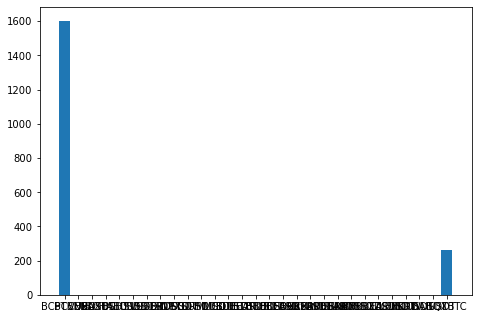

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(symbols,volatility)
plt.show()